# term1_sprint4 機械学習スクラッチ ロジスティック回帰

## 2.ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [21]:
x0 = X_train_i
i = np.ones((x0.shape[0], 1))
x = np.concatenate((i, x0), axis=1)

t = np.array([0,0,0,0,0])
z = np.dot(t, x.T)
s = 1 / (1+np.exp(-z))
print("s",s)
y = y_train_i
e = s - y
b = 1
g = (np.dot(e, x) + (b * t) / y.size)
l = 0.1
tt = t - l * g
print("tt",tt.shape)
x02 = X_test_i
y2 = y_test_i
i2 = np.ones((x02.shape[0], 1))
x2 = np.concatenate((i2, x02), axis=1)
z2 = np.dot(tt, x2.T)
s2 = 1 / (1+np.exp(-z2))
# loss = np.mean((-y2*np.log(s2)) - (1-y2)*np.log(1-s2)) + (np.mean(np.dot(b, (tt**2)))/2)

print(y2.shape)
print(s2.shape)
print(tt.shape)

p = np.log(s2)
print(p.T.shape)
a1 = -y2 * np.log(s2).T
print(a1.shape)
a2 = np.mean(np.dot(b, (tt**2)))/2
print(a2.shape)

b1 = ((1-y2)*np.log(1-s2).T)
print(b1.shape)

ab = ((-y2 * np.log(s2).T) - ((1-y2)*np.log(1-s2).T))
abc = ab + a2

print(abc.shape)

s [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
tt (105, 5)
(45, 1)
(105, 45)
(105, 5)
(45, 105)
(45, 105)
()
(45, 105)
(45, 105)


<ipython-input-21-0cbc655e996c>:35: RuntimeWarning: divide by zero encountered in log
  b1 = ((1-y2)*np.log(1-s2).T)
<ipython-input-21-0cbc655e996c>:35: RuntimeWarning: invalid value encountered in multiply
  b1 = ((1-y2)*np.log(1-s2).T)
<ipython-input-21-0cbc655e996c>:38: RuntimeWarning: divide by zero encountered in log
  ab = ((-y2 * np.log(s2).T) - ((1-y2)*np.log(1-s2).T))
<ipython-input-21-0cbc655e996c>:38: RuntimeWarning: invalid value encountered in multiply
  ab = ((-y2 * np.log(s2).T) - ((1-y2)*np.log(1-s2).T))


In [47]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose, fit_intercept=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.fit_intercept = fit_intercept
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

# 問1.問２（解答）------------------------------------------------------
    
    # Xのindex0を1の値に調整
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # シグモイド関数の計算
    def _sigmoid(self,z):
        return 1 / (1+np.exp(-z))
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # fit
        if self.fit_intercept:
            X = self._add_intercept(X)
            
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.iter):
            # 問1 シグモイド関数の計算
            z = np.dot(self.theta, X.T)
            sigmoid = self._sigmoid(z)
            
            # 残差の計算
            error = sigmoid - y.T
            
            # 問2 最急降下法の計算
            gradient = (np.dot(error, X) + (self.bias * self.theta) / y.size) 
            
            # 次のshetaを更新
            self.theta = self.theta - self.lr * gradient
            
            # 目的関数
            if (type(X_val) != None):
                X2 = self._add_intercept(X_val)
                z_val = np.dot(self.theta, X2.T)
                sigmoid_val = self._sigmoid(z_val)
                self.val_loss[i] = self._loss(sigmoid_val, y_val)
            
            # verboseをTrueにした際は学習過程を出力
            if (self.verbose == True):
                print(f"loss: {self.val_loss}\t")
            
# 問4 （解答）---------------------------------------------------------          
            
    def _loss(self, S, y):
        J = np.mean((-y*np.log(S).T) - (1-y)*np.log(1-S.T)) + (np.mean(np.dot(self.bias, (self.theta**2)))/2)
        return J
            
# 問３ (解答)---------------------------------------------------------

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """ 
        # round()は一般的な四捨五入と異なるので注意
        return self.predict_proba(X).round()
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.fit_intercept:
            X = self._add_intercept(X)
            z = np.dot(self.theta, X.T)

            return self._sigmoid(z)

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$g(z) = \frac{1}{1+e^{−z}}.$$
線形回帰の仮定関数は次の式でした。
$$h_\theta(x) = \theta^T \cdot x.$$
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.$$

x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル



### 1.1.1（データセット）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# np.random.seed(1)
X_data = np.array([1,2,3,4,5,6,7,8,9,10])
Y_data = np.array([0,1,0,1,0,1,0,1,0,1])
print(f"Xの値:{X_data}  Yの値:{Y_data}")

Xの値:[ 1  2  3  4  5  6  7  8  9 10]  Yの値:[0 1 0 1 0 1 0 1 0 1]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,test_size=0.50, random_state=2)
print(f"Xの訓練値:{X_train}  Yの訓練値:{y_train}  Xの正解値:{X_test}  Yの正解値:{y_test}")

Xの訓練値:[ 3  4  7 10  9]  Yの訓練値:[0 1 0 1 0]  Xの正解値:[5 2 6 1 8]  Yの正解値:[0 1 1 0 1]


## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1$$

α
  : 学習率


i
 : サンプルのインデックス


j
 : 特徴量のインデックス


m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解ラベル


θ
j
 : j番目のパラメータ（重み）


λ
 : 正則化パラメータ

### 2.1.1（クラス内に記載）

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数$hθ(x)$の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

### 3.1.1（検証用）スクラッチ

In [5]:
slg = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=1, verbose=False)
slg.fit(X_train.reshape(-1,1), y_train, X_test.reshape(-1,1), y_test)

In [6]:
print("元の値\n",X_test.reshape(-1,1))
print("predict\n",slg.predict(X_test.reshape(-1,1)))
print("predict_proba\n",slg.predict_proba(X_test.reshape(-1,1)))

元の値
 [[5]
 [2]
 [6]
 [1]
 [8]]
predict
 [1. 1. 1. 1. 1.]
predict_proba
 [0.91488021 0.7023572  0.94685534 0.58738191 0.97998233]


### 3.2.1（確認用）sklearn

In [7]:
from sklearn.linear_model import LogisticRegression
log_kakunin = LogisticRegression() 
log_kakunin.fit(X_train.reshape(-1,1), y_train)
kakunin_pred = log_kakunin.predict(X_test.reshape(-1,1))
kakunin_proba = log_kakunin.predict_proba(X_test.reshape(-1,1))

In [8]:
print("元の値\n",X_test.reshape(-1,1))
print("predict\n",kakunin_pred)
print("predict_proba\n",kakunin_proba)

元の値
 [[5]
 [2]
 [6]
 [1]
 [8]]
predict
 [0 0 0 0 0]
predict_proba
 [[0.63189518 0.36810482]
 [0.68652264 0.31347736]
 [0.61281734 0.38718266]
 [0.70372457 0.29627543]
 [0.57365994 0.42634006]]


## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面に## して御覧ください。

$$J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j$$

m
  : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解ラベル


θ
j
 : j番目のパラメータ（重み）


n
 : 特徴量の数


λ
 : 正則化パラメータ



### 4.1.1（解答）

In [ ]:
slg = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=1, verbose=True)
slg.fit(X_train.reshape(-1,1), y_train, X_test.reshape(-1,1), y_test)

loss: [1.15913602 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.   

# 3.検証

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



### 5.1.1（irisデータセット)

In [12]:
from sklearn.datasets import load_iris
#irisデータの読み込み
iris_dataset = load_iris()

# 得微量
X = pd.DataFrame(iris_dataset["data"])
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

#targetを読み込み、値を品種に変更。
y = pd.DataFrame(iris_dataset["target"])
y.columns = ["species"]

#1つのデータに結合、不要な要素を削除する。
df_master = pd.concat([X, y], axis=1) 
df = df_master[df_master["species"] != 0]
df

sepal_length  sepal_width  petal_length  petal_width  species
50            7.0          3.2           4.7          1.4        1
51            6.4          3.2           4.5          1.5        1
52            6.9          3.1           4.9          1.5        1
53            5.5          2.3           4.0          1.3        1
54            6.5          2.8           4.6          1.5        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[100 rows x 5 columns]

Text(0.5, 1.0, 'Iris data')

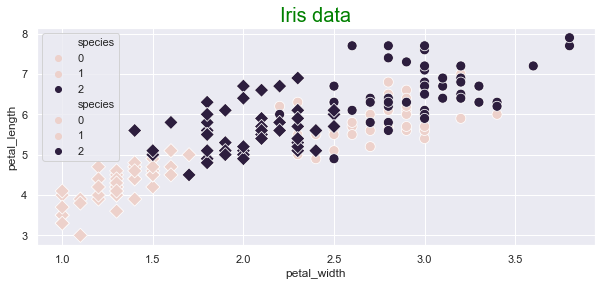

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

color_list = ["green", "blue"]
ax1 = sns.scatterplot('sepal_width', 'sepal_length', data=df, hue="species", marker="o", s=100)
ax2 = sns.scatterplot('petal_width', 'petal_length', data=df, hue="species", marker="D", s=100)
ax.set_title("Iris data", fontsize=20, color="green")

### 5.2.1 （前処理)

In [14]:
X = X.values
y = y.values

In [15]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.30, random_state=3)
print(f"Xの訓練値:{X_train_i.shape}  Yの訓練値:{y_train_i.shape}  Xの正解値:{X_test_i.shape}  Yの正解値:{y_test_i.shape}")

Xの訓練値:(105, 4)  Yの訓練値:(105, 1)  Xの正解値:(45, 4)  Yの正解値:(45, 1)


### 5.3.1（学習）

In [32]:
slg = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=1, verbose=False)
slg.fit(X_train_i, y_train_i, X_test_i, y_test_i)
slg_pred = slg.predict(X_test_i)
slg_proba = slg.predict_proba(X_test_i)

<ipython-input-31-8dd541f91d8d>:98: RuntimeWarning: divide by zero encountered in log
  J = np.mean((-y*np.log(S).T) - (1-y)*np.log(1-S.T)) + (np.mean(np.dot(self.bias, (self.theta**2)))/2)
<ipython-input-31-8dd541f91d8d>:98: RuntimeWarning: invalid value encountered in multiply
  J = np.mean((-y*np.log(S).T) - (1-y)*np.log(1-S.T)) + (np.mean(np.dot(self.bias, (self.theta**2)))/2)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [33]:
print("元の値\n",X_test_i)
print("predict\n",slg_pred)
print("predict_proba\n",slg_proba)

元の値
 [[4.6 3.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.  1.6 0.2]
 [5.7 4.4 1.5 0.4]
 [7.7 2.6 6.9 2.3]
 [5.5 2.5 4.  1.3]
 [4.6 3.4 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.1 1.3]
 [4.4 3.  1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.5 2.3 4.  1.3]
 [6.7 3.1 5.6 2.4]
 [5.  3.5 1.3 0.3]
 [6.3 2.5 4.9 1.5]
 [7.7 3.  6.1 2.3]
 [5.7 2.5 5.  2. ]
 [4.4 3.2 1.3 0.2]
 [6.2 2.8 4.8 1.8]
 [6.8 3.  5.5 2.1]
 [6.9 3.1 5.1 2.3]
 [6.8 2.8 4.8 1.4]
 [5.4 3.9 1.7 0.4]
 [7.2 3.6 6.1 2.5]
 [6.1 2.6 5.6 1.4]
 [5.8 2.7 4.1 1. ]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.7 1.5]
 [5.8 4.  1.2 0.2]
 [4.8 3.4 1.9 0.2]
 [6.9 3.1 5.4 2.1]
 [6.6 2.9 4.6 1.3]
 [4.4 2.9 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [6.7 3.  5.  1.7]
 [4.5 2.3 1.3 0.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.2 4.5 1.5]
 [6.4 2.8 5.6 2.1]
 [5.8 2.7 3.9 1.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.5 1.4 0.3]
 [6.1 3.  4.9 1.8]]
predict
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

### 5.4.1(評価)

In [36]:
y_test_i.shape

(45, 1)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test_i, y_pred=slg_pred.T))
print('accuracy = ', accuracy_score(y_true=y_test_i, y_pred=slg_pred.T))
print('precision = ', precision_score(y_true=y_test_i, y_pred=slg_pred.T, average="micro"))
print('recall = ', recall_score(y_true=y_test_i, y_pred=slg_pred.T, average="micro"))
print('f1 score = ', f1_score(y_true=y_test_i, y_pred=slg_pred.T, average="micro"))

confusion matrix = 
 [[ 0 17  0]
 [ 0 14  0]
 [ 0 14  0]]
accuracy =  0.3111111111111111
precision =  0.3111111111111111
recall =  0.3111111111111111
f1 score =  0.3111111111111111


In [46]:
log_kakunin = LogisticRegression()
log_kakunin.fit(X_train_i, y_train_i)
kakunin_pred = log_kakunin.predict(X_test_i)
kakunin_proba = log_kakunin.predict_proba(X_test_i)

print("元の値\n",X_test_i)
print("predict\n",kakunin_pred)
print("predict_proba\n",kakunin_proba)

print('confusion matrix = \n', confusion_matrix(y_true=y_test_i, y_pred=kakunin_pred))
print('accuracy = ', accuracy_score(y_true=y_test_i, y_pred=kakunin_pred))
print('precision = ', precision_score(y_true=y_test_i, y_pred=kakunin_pred, average="micro"))
print('recall = ', recall_score(y_true=y_test_i, y_pred=kakunin_pred, average="micro"))
print('f1 score = ', f1_score(y_true=y_test_i, y_pred=kakunin_pred, average="micro"))

元の値
 [[4.6 3.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.  1.6 0.2]
 [5.7 4.4 1.5 0.4]
 [7.7 2.6 6.9 2.3]
 [5.5 2.5 4.  1.3]
 [4.6 3.4 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.1 1.3]
 [4.4 3.  1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.5 2.3 4.  1.3]
 [6.7 3.1 5.6 2.4]
 [5.  3.5 1.3 0.3]
 [6.3 2.5 4.9 1.5]
 [7.7 3.  6.1 2.3]
 [5.7 2.5 5.  2. ]
 [4.4 3.2 1.3 0.2]
 [6.2 2.8 4.8 1.8]
 [6.8 3.  5.5 2.1]
 [6.9 3.1 5.1 2.3]
 [6.8 2.8 4.8 1.4]
 [5.4 3.9 1.7 0.4]
 [7.2 3.6 6.1 2.5]
 [6.1 2.6 5.6 1.4]
 [5.8 2.7 4.1 1. ]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.7 1.5]
 [5.8 4.  1.2 0.2]
 [4.8 3.4 1.9 0.2]
 [6.9 3.1 5.4 2.1]
 [6.6 2.9 4.6 1.3]
 [4.4 2.9 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [6.7 3.  5.  1.7]
 [4.5 2.3 1.3 0.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.2 4.5 1.5]
 [6.4 2.8 5.6 2.1]
 [5.8 2.7 3.9 1.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.5 1.4 0.3]
 [6.1 3.  4.9 1.8]]
predict
 [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
predict_proba
 [[9.75762235e-01 2.423

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

In [ ]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(1, 2, 1)

ax1.lineplot(GrLivArea_test, g_plot_1.predict(GrLivArea_test)/1000, color = 'red') # 回帰直線をプロット
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price in $1000")
ax1.grid(True) 
